**Objetivos desta aula prática:**

1. Dividir dados em treino e teste com estratificação.
2. Avaliar modelos de classificação usando:
 - Matriz de Confusão
 - Acurácia, Precisão, Revocação (Recall), F1-Score
 - Curva ROC e AUC

3. Avaliar modelos de regressão usando:
 * MSE, RMSE, MAE e R²

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

dados = pd.read_csv('../data/dados_aprovacao_alunos.csv')

x = dados[['nota', 'faltas']] # Variáveis preditoras (dependentes)
y = dados['aprovado'] # Variável alvo (classe)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [13]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

LogisticRegression()

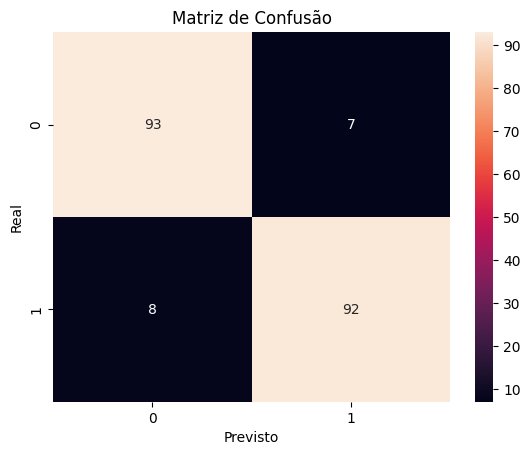

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(x_test)
matriz_confusao = confusion_matrix(y_test, y_pred)

sns.heatmap(matriz_confusao, annot=True, fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


- **VP (Verdadeiros Positivos)**: Alunos que **realmente reprovaram** e foram **corretamente previstos como reprovados**.

- **VN (Verdadeiros Negativos)**: Alunos que **realmente passaram** e foram **corretamente previstos como aprovados** pelo modelo.

- **FP (Falsos Positivos)**: Alunos que o modelo "achou" que reprovariam mas passaram  

- **FN (Falsos Negativos)**: Alunos que o modelo "achou" que passariam mas reprovaram



[🟩 VP: 93] | [🟥 FP: 7]
------------|------------
[🟨 FN: 8]  | [🟦 VN: 92]



Legenda:

🟩 Verdadeiro Positivo

🟦 Verdadeiro Negativo

🟥 Falso Positivo (Erro I)

🟨 Falso Negativo (Erro II)

| Métrica         | Fórmula               | Cálculo               | Resultado | Interpretação                                                                 |
|-----------------|-----------------------|-----------------------|-----------|-------------------------------------------------------------------------------|
| **Acurácia**    | (VP + VN) / Total     | (93 + 92) / 200       | 92.5%     | 92.5% das previsões estão corretas                                             |
| **Precisão**    | VP / (VP + FP)        | 93 / (93 + 7)         | 93%      | Dos previstos como reprovados, 93% realmente reprovaram.                       |
| **Recall**      | VP / (VP + FN)        | 93 / (93 + 8)         | 92.1%     | Dos alunos que reprovaram, 92.1% foram identificados.                             |
| **F1-Score**    | 2*(Prec*Rec)/(Prec+Rec)| 2 * (0.93 * 0.921) / (0.93 + 0.921) | 92.5%   | Média harmônica entre Precisão e Recall, indicando um equilíbrio entre ambos. |
| **Especificidade** | VN / (VN + FP)     | 92 / (92 + 7)         | 92.9%    | Dos alunos que passaram, 92.9% foram identificados corretamente.                |
| **Taxa de Erro**| (FP + FN) / Total     | (7 + 8) / 200         | 7.5%      | 7.5% das previsões estão incorretas                                           |


In [15]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       100
           1       0.93      0.92      0.92       100

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.92       200
weighted avg       0.93      0.93      0.92       200



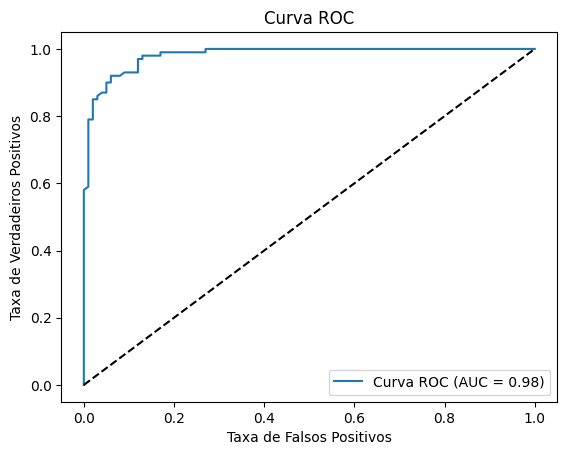

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = modelo.predict_proba(x_test)[:, 1] # Probabilidade de aprovação
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='Curva ROC (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Métricas de Regressão

In [17]:
dados_regressao = pd.read_csv('../data/dados_previsao_nota.csv')
dados_regressao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   horas_estudo  200 non-null    float64
 1   nota_final    200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [18]:
x_reg = dados_regressao['horas_estudo'].values.reshape(-1, 1)
y_reg = dados_regressao['nota_final']

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    x_reg, y_reg,
    test_size=0.2,
    random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

modelo_reg = LinearRegression()
modelo_reg.fit(x_train_reg, y_train_reg)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_reg = modelo_reg.predict(x_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("{:<6} {:<.4f}  {}".format("RMSE:", rmse, "Raiz do Erro Quadrático Médio: indica o erro médio do modelo em unidades da variável alvo. É sensível a outliers."))
print("{:<6} {:<.4f}  {}".format("MAE:", mae, "Erro Absoluto Médio: indica a média das diferenças absolutas entre os valores reais e as previsões. Menos sensível a outliers que o RMSE."))
print("{:<6} {:<.4f}  {}".format("R²:", r2, "R-quadrado: indica a proporção da variância na variável dependente que é explicada pelo modelo. Varia de 0 a 1."))
print("{:<6} {:<.4f}  {}".format("MSE:", mse, "Erro Quadrático Médio: similar ao RMSE, mas sem a raiz quadrada. Usado principalmente para otimização de modelos."))

RMSE:  2.5039  Raiz do Erro Quadrático Médio: indica o erro médio do modelo em unidades da variável alvo. É sensível a outliers.
MAE:   1.9550  Erro Absoluto Médio: indica a média das diferenças absolutas entre os valores reais e as previsões. Menos sensível a outliers que o RMSE.
R²:    0.3779  R-quadrado: indica a proporção da variância na variável dependente que é explicada pelo modelo. Varia de 0 a 1.
MSE:   6.2695  Erro Quadrático Médio: similar ao RMSE, mas sem a raiz quadrada. Usado principalmente para otimização de modelos.


## 🔍 **Escolha Baseada no Seu Objetivo**

| Métrica | Melhor Para...                    | Exemplo Prático                     | Cuidado!                          |
|---------|-----------------------------------|-------------------------------------|-----------------------------------|
| **RMSE** | Quando **erros grandes são graves** (e devem ser penalizados mais) | Prever doses de medicamentos (erros altos são perigosos) | Sensível a outliers               |
| **MAE**  | Quando **todos os erros têm igual importância** | Prever preços de produtos cotidianos | Não destaca erros graves          |
| **R²**   | Saber **% da variância explicada** pelo modelo | Comparar dois modelos de previsão de notas | Pode ser alto mesmo com erros grandes |
| **MSE**  | Otimização de modelos (foco nos **erros quadráticos**) | Uso interno em algoritmos de ML | Difícil interpretação direta      |

## 📌 **Regra Prática: Qual Métrica Escolher?**

1. **"Preciso entender o erro em unidades reais?"** → RMSE ou MAE  
   - RMSE se erros grandes forem críticos  
   - MAE se todos os erros forem igualmente importantes  

2. **"Quero comparar modelos diferentes?"** → R² (quanto maior, melhor)  

3. **"Meu modelo será usado para tomar decisões de alto risco?"** → RMSE (prioriza evitar erros graves)  

4. **"Meus dados têm muitos valores extremos?"** → MAE (é mais robusto)  

## 💡 **Exemplo com Notas de Alunos**
- Se você está prevendo **notas finais** para identificar alunos em risco:  
  - Use **RMSE** (errar em 5 pontos é pior que errar em 1)  
- Se está prevendo **aprovados/reprovados**:  
  - Use **R²** para ver se o modelo explica bem a variação nas notas  

## ⚠️ **Armadilhas Comuns**
- **Só usar R²**: Pode mascarar erros grandes se o modelo estiver enviesado  
- **Ignorar outliers**: RMSE vai inflacionar, MAE é mais justo  
- **Não contextualizar**: Um RMSE de 2 é bom? Depende! Se as notas vão de 0 a 10, é ótimo. Se vão de 0 a 100, é péssimo.  